# Goal

Perform analysis and basics recommendations based on similar genres and movies which users like.

Key points on which we will be focusing on:
- Profitability of Movies
- language based gross analysis
- comparison of gross and profit for different genres
- recommendation systems based on Actors, Movies, genres

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd

## For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## For jupyter notebook widgets
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

## For interactive shells
from IPython.display import display

## Suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Setting up the chart size and background
#plt.rcParams["figure.figsize"] = (16, 7)
#plt.style.use("fivethirtyeight")

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

# Loading the dataset

In [3]:
# Let's read the dataset
data = pd.read_csv("movie_metadata.csv")

In [4]:
# let's check the shape of the DataFrame
data.shape

(5043, 28)

In [5]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [7]:
## let's drop the unnecessary columns
data.drop(["color", 
           "director_facebook_likes",
           "actor_3_facebook_likes",
           "actor_1_facebook_likes",
           "actor_2_facebook_likes",
           "cast_total_facebook_likes",
           "facenumber_in_poster",
           "content_rating",
           "country",
           "movie_imdb_link",
           "aspect_ratio",
           "plot_keywords"], axis=1, inplace=True)

In [8]:
data.shape

(5043, 16)

In [9]:
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [10]:
data.head()

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,3054.0,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,1238.0,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,994.0,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,2701.0,English,250000000.0,2012.0,8.5,164000
4,Doug Walker,NaN,NaN,Rob Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,NaN,NaN,NaN,NaN,NaN,7.1,0


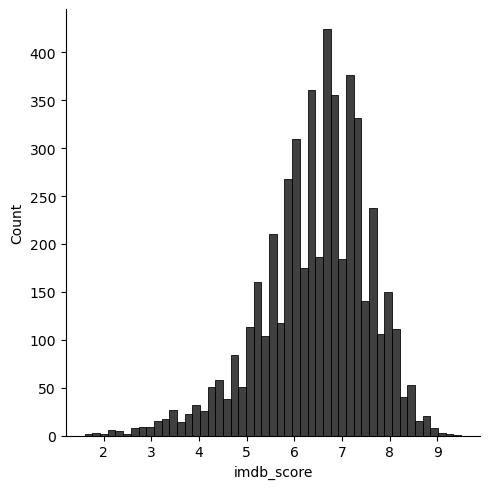

In [11]:
sns.displot(data["imdb_score"], color="black")
plt.show()

Based on this figure, it can be deduced that most of the ratings are within the interval [5, 8.5] with a peak at 7.0. This shows that movies are overall highly rated.

# Missing values Imputation

In [12]:
data.isna().sum()

director_name             104
num_critic_for_reviews     50
duration                   15
actor_2_name               13
gross                     884
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
actor_3_name               23
num_user_for_reviews       21
language                   12
budget                    492
title_year                108
imdb_score                  0
movie_facebook_likes        0
dtype: int64

In [13]:
## Let's check the percentage of missing values for each column
round(100*((data.isna().sum())/(data.shape[0])), 2)

director_name              2.06
num_critic_for_reviews     0.99
duration                   0.30
actor_2_name               0.26
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
actor_3_name               0.46
num_user_for_reviews       0.42
language                   0.24
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [15]:
## Deleting all rows with NaN values from "gross" and "budget"
data = data[~np.isnan(data["gross"])]
data = data[~np.isnan(data["budget"])]

In [18]:
## Checking number of Nan values left in the Data
data.isna().sum(axis=0)

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [19]:
##let's retain the rows with less than 2 missing values
data = data[data.isnull().sum(axis=1) <= 2]

In [20]:
data.isna().sum()

director_name             0
num_critic_for_reviews    1
duration                  1
actor_2_name              2
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              7
num_user_for_reviews      0
language                  3
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3888 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   director_name           3888 non-null   object 
 1   num_critic_for_reviews  3887 non-null   float64
 2   duration                3887 non-null   float64
 3   actor_2_name            3886 non-null   object 
 4   gross                   3888 non-null   float64
 5   genres                  3888 non-null   object 
 6   actor_1_name            3888 non-null   object 
 7   movie_title             3888 non-null   object 
 8   num_voted_users         3888 non-null   int64  
 9   actor_3_name            3881 non-null   object 
 10  num_user_for_reviews    3888 non-null   float64
 11  language                3885 non-null   object 
 12  budget                  3888 non-null   float64
 13  title_year              3888 non-null   float64
 14  imdb_score              3888 non-null   

In [23]:
# let's impute the missing values

# using mean for numerical columns
data["num_critic_for_reviews"].fillna(data["num_critic_for_reviews"].mean(), inplace=True)
data["duration"].fillna(data["duration"].mean(), inplace=True)

# using mode for the categorical columns
data["language"].fillna(data["language"].mode()[0], inplace=True)

## As we cannot replace the actors missing values by any statistical 
## values, let's replace the NaN values by "Unknown Actor"
data["actor_2_name"].fillna("Unknown Actor", inplace=True)
data["actor_3_name"].fillna("Unknown Actor", inplace = True)

In [24]:
data.isna().sum()

director_name             0
num_critic_for_reviews    0
duration                  0
actor_2_name              0
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              0
num_user_for_reviews      0
language                  0
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

# Top 10 profitable Movies of all time

In [26]:
data["gross"], data["budget"]

(0       760505847.0
 1       309404152.0
 2       200074175.0
 3       448130642.0
 5        73058679.0
            ...     
 5033       424760.0
 5034        70071.0
 5035      2040920.0
 5037         4584.0
 5042        85222.0
 Name: gross, Length: 3888, dtype: float64,
 0       237000000.0
 1       300000000.0
 2       245000000.0
 3       250000000.0
 5       263700000.0
            ...     
 5033         7000.0
 5034         7000.0
 5035         7000.0
 5037         9000.0
 5042         1100.0
 Name: budget, Length: 3888, dtype: float64)

In [27]:
data["gross"] = data["gross"]/1000000
data["budget"] = data["budget"]/1000000

In [28]:
data["gross"], data["budget"]

(0       760.505847
 1       309.404152
 2       200.074175
 3       448.130642
 5        73.058679
            ...    
 5033      0.424760
 5034      0.070071
 5035      2.040920
 5037      0.004584
 5042      0.085222
 Name: gross, Length: 3888, dtype: float64,
 0       237.0000
 1       300.0000
 2       245.0000
 3       250.0000
 5       263.7000
           ...   
 5033      0.0070
 5034      0.0070
 5035      0.0070
 5037      0.0090
 5042      0.0011
 Name: budget, Length: 3888, dtype: float64)

In [29]:
# let's create the profit column
data["profit"] = data["gross"] - data["budget"]

In [30]:
data["profit"]

0       523.505847
1         9.404152
2       -44.925825
3       198.130642
5      -190.641321
           ...    
5033      0.417760
5034      0.063071
5035      2.033920
5037     -0.004416
5042      0.084122
Name: profit, Length: 3888, dtype: float64

In [31]:
data[["movie_title", "profit"]].sort_values(by="profit", ascending=False).head(10)

,movie_title,profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
794,The Avengers,403.279547
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061


We can observe here that there are some duplicate values. So let's remove them

In [32]:
data.shape

(3888, 17)

In [33]:
data.drop_duplicates(subset=None, keep="first", inplace=True)

In [34]:
data.shape

(3853, 17)

Some rows have been successfully removed.

In [35]:
data[["movie_title", "profit"]].sort_values(by="profit", ascending=False).head(10)

,movie_title,profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061
439,The Hunger Games,329.999255


# Working on Language and Duration columns

In [36]:
data["language"].value_counts()

English       3673
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Dutch            3
Persian          3
Thai             3
Hebrew           3
Danish           3
Aboriginal       2
Dari             2
Indonesian       2
Russian          1
Romanian         1
Vietnamese       1
Arabic           1
Dzongkha         1
Zulu             1
None             1
Aramaic          1
Czech            1
Telugu           1
Icelandic        1
Filipino         1
Hungarian        1
Maya             1
Bosnian          1
Mongolian        1
Kazakh           1
Swedish          1
Name: language, dtype: int64

In [37]:
# let's create a function to categorize all the languages apart 
## from english as "Foreign"
data["language"] = data["language"].apply(lambda x: "English" if x == "English" else "Foreign")

In [38]:
data["language"].value_counts()

English    3673
Foreign     180
Name: language, dtype: int64

In [39]:
data["duration"]

0       178.0
1       169.0
2       148.0
3       164.0
5       132.0
        ...  
5033     77.0
5034     80.0
5035     81.0
5037     95.0
5042     90.0
Name: duration, Length: 3853, dtype: float64

In [40]:
data["duration"].apply(lambda x: "short" if x<=120.0 else "long")

0        long
1        long
2        long
3        long
5        long
        ...  
5033    short
5034    short
5035    short
5037    short
5042    short
Name: duration, Length: 3853, dtype: object

In [41]:
data["duration"] = data["duration"].apply(lambda x: "short" if x<=120.0 else "long")

In [42]:
data["duration"].value_counts()

short    2936
long      917
Name: duration, dtype: int64

# Extraction of Movies Genres

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 5042
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   director_name           3853 non-null   object 
 1   num_critic_for_reviews  3853 non-null   float64
 2   duration                3853 non-null   object 
 3   actor_2_name            3853 non-null   object 
 4   gross                   3853 non-null   float64
 5   genres                  3853 non-null   object 
 6   actor_1_name            3853 non-null   object 
 7   movie_title             3853 non-null   object 
 8   num_voted_users         3853 non-null   int64  
 9   actor_3_name            3853 non-null   object 
 10  num_user_for_reviews    3853 non-null   float64
 11  language                3853 non-null   object 
 12  budget                  3853 non-null   float64
 13  title_year              3853 non-null   float64
 14  imdb_score              3853 non-null   

In [44]:
data.genres

0           Action|Adventure|Fantasy|Sci-Fi
1                  Action|Adventure|Fantasy
2                 Action|Adventure|Thriller
3                           Action|Thriller
5                   Action|Adventure|Sci-Fi
                       ...                 
5033                  Drama|Sci-Fi|Thriller
5034                               Thriller
5035    Action|Crime|Drama|Romance|Thriller
5037                           Comedy|Drama
5042                            Documentary
Name: genres, Length: 3853, dtype: object

In [46]:
data.genres[0].split("|")

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [48]:
data["genres"].apply(lambda x: x.split("|"))

0            [Action, Adventure, Fantasy, Sci-Fi]
1                    [Action, Adventure, Fantasy]
2                   [Action, Adventure, Thriller]
3                              [Action, Thriller]
5                     [Action, Adventure, Sci-Fi]
                          ...                    
5033                    [Drama, Sci-Fi, Thriller]
5034                                   [Thriller]
5035    [Action, Crime, Drama, Romance, Thriller]
5037                              [Comedy, Drama]
5042                                [Documentary]
Name: genres, Length: 3853, dtype: object

In [51]:
data["movie_genres"] = data["genres"].str.split("|")
data["genre_1"] = data["movie_genres"].apply(lambda x: x[0])

data["genre_2"] = data["movie_genres"].apply(lambda x: x[1] if len(x) > 1 else x[0])
data["genre_3"] = data["movie_genres"].apply(lambda x: x[2] if len(x) > 2 else x[0])
data["genre_4"] = data["movie_genres"].apply(lambda x: x[3] if len(x) > 3 else x[0])

In [52]:
data[["genres", "genre_1", "genre_2", "genre_3", "genre_4"]]

,genres,genre_1,genre_2,genre_3,genre_4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action
...,...,...,...,...,...
5033,Drama|Sci-Fi|Thriller,Drama,Sci-Fi,Thriller,Drama
5034,Thriller,Thriller,Thriller,Thriller,Thriller
5035,Action|Crime|Drama|Romance|Thriller,Action,Crime,Drama,Romance
5037,Comedy|Drama,Comedy,Drama,Comedy,Comedy


# Calculating Social Media Popularity

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 5042
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   director_name           3853 non-null   object 
 1   num_critic_for_reviews  3853 non-null   float64
 2   duration                3853 non-null   object 
 3   actor_2_name            3853 non-null   object 
 4   gross                   3853 non-null   float64
 5   genres                  3853 non-null   object 
 6   actor_1_name            3853 non-null   object 
 7   movie_title             3853 non-null   object 
 8   num_voted_users         3853 non-null   int64  
 9   actor_3_name            3853 non-null   object 
 10  num_user_for_reviews    3853 non-null   float64
 11  language                3853 non-null   object 
 12  budget                  3853 non-null   float64
 13  title_year              3853 non-null   float64
 14  imdb_score              3853 non-null   

In [61]:
data["movie_facebook_likes"]

0        33000
1            0
2        85000
3       164000
5        24000
         ...  
5033     19000
5034        74
5035         0
5037       413
5042       456
Name: movie_facebook_likes, Length: 3853, dtype: int64

In [56]:
data["num_user_for_reviews"].max()

5060.0

In [58]:
data["num_voted_users"].max()

1689764

In [68]:
data["popularity_social_media"] = ((data["movie_facebook_likes"]*data["num_user_for_reviews"])/(data["num_voted_users"]))/1000000
#denom = data["movie_facebook_likes"] + data["num_voted_users"] + data["num_user_for_reviews"]

#data["popularity_social_media"] = ((data["movie_facebook_likes"]/denom)*(data["num_user_for_reviews"]/denom)*(data["num_voted_users"]/denom))

x = data[["movie_title", "popularity_social_media"]].sort_values(by="popularity_social_media", ascending=False).head(20).reset_index()

x

,index,movie_title,popularity_social_media
0,10,Batman v Superman: Dawn of Justice,0.001600
1,150,Ghostbusters,0.001076
2,1582,Ghostbusters,0.001076
3,96,Interstellar,0.001025
4,3015,10 Days in a Madhouse,0.000828
5,945,Into the Woods,0.000693
6,73,Suicide Squad,0.000653
7,1190,Fifty Shades of Grey,0.000624
8,108,Warcraft,0.000623
9,92,Independence Day: Resurgence,0.000599


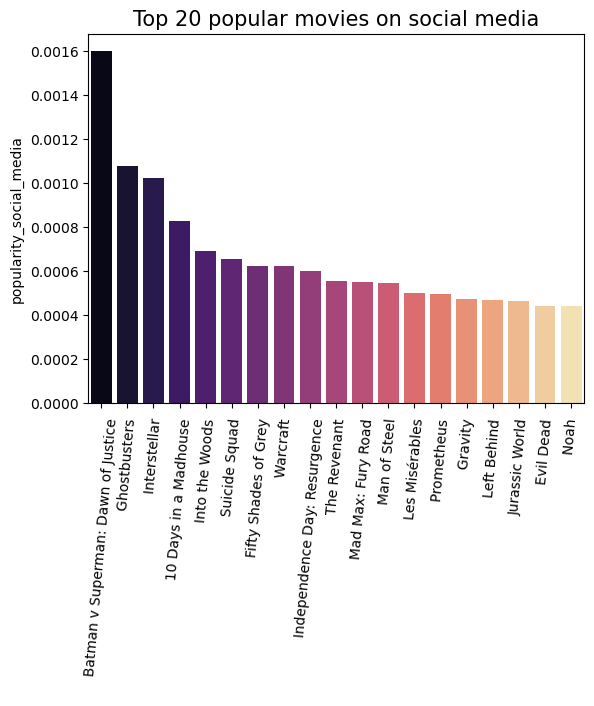

In [69]:
sns.barplot(x["movie_title"], x["popularity_social_media"], palette = "magma")
plt.title("Top 20 popular movies on social media", fontsize=15)
plt.xticks(rotation=85, fontsize=10)
plt.xlabel(" ")
plt.show()

# Analyzing the genres

In [70]:
data.head()

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,...,title_year,imdb_score,movie_facebook_likes,profit,movie_genres,genre_1,genre_2,genre_3,genre_4,popularity_social_media
0,James Cameron,723.0,long,Joel David Moore,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,...,2009.0,7.9,33000,523.505847,"[Action, Adventure, Fantasy, Sci-Fi]",Action,Adventure,Fantasy,Sci-Fi,0.000114
1,Gore Verbinski,302.0,long,Orlando Bloom,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,...,2007.0,7.1,0,9.404152,"[Action, Adventure, Fantasy]",Action,Adventure,Fantasy,Action,0.000000
2,Sam Mendes,602.0,long,Rory Kinnear,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,...,2015.0,6.8,85000,-44.925825,"[Action, Adventure, Thriller]",Action,Adventure,Thriller,Action,0.000306
3,Christopher Nolan,813.0,long,Christian Bale,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,...,2012.0,8.5,164000,198.130642,"[Action, Thriller]",Action,Thriller,Action,Action,0.000387
5,Andrew Stanton,462.0,long,Samantha Morton,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,Polly Walker,...,2012.0,6.6,24000,-190.641321,"[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi,Action,0.000083


'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [84]:
genre1_grouping = data[["genre_1", "gross"]].groupby(["genre_1"]).agg(["max", "mean", "min"])
genre1_grouping.style.background_gradient(cmap = "terrain_r")

In [88]:
genre1_grouping.index

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western'],
      dtype='object', name='genre_1')

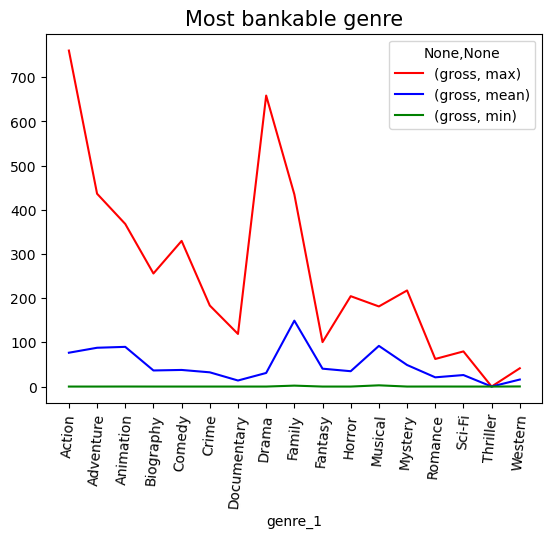

In [89]:
genre1_grouping.plot(kind="line", color=["red", "blue", "green"])
plt.title("Most bankable genre", fontsize=15)
plt.xticks(np.arange(17), genre1_grouping.index, rotation=85, fontsize=10)
plt.show()

The most bankable genres are : **Action, Adventure, Animation, Comedy, Drama, Family**.

In [91]:
print("The most profitable movie for each genre")
display(data.loc[data.groupby(data["genre_1"])["profit"].idxmax()][["genre_1", "movie_title", "gross"]].style.background_gradient(cmap="terrain_r"))

The most profitable movie for each genre


,genre_1,movie_title,gross
0,Action,Avatar,760.505847
509,Adventure,The Lion King,422.783777
521,Animation,Despicable Me 2,368.049635
1403,Biography,The Blind Side,255.950375
836,Comedy,Forrest Gump,329.691196
3466,Crime,The Godfather,134.821952
3583,Documentary,Fahrenheit 9/11,119.078393
26,Drama,Titanic,658.672302
3080,Family,E.T. the Extra-Terrestrial,434.949459
2485,Fantasy,The Others,96.471845


# Profit and Loss Analysis on English and Foreign Movies

In [92]:
data["title_year"].dtype

dtype('float64')

In [93]:
data["title_year"]

0       2009.0
1       2007.0
2       2015.0
3       2012.0
5       2012.0
         ...  
5033    2004.0
5034    2005.0
5035    1992.0
5037    2011.0
5042    2004.0
Name: title_year, Length: 3853, dtype: float64

In [94]:
data["title_year"] = data["title_year"].astype(int)

In [95]:
data["title_year"]

0       2009
1       2007
2       2015
3       2012
5       2012
        ... 
5033    2004
5034    2005
5035    1992
5037    2011
5042    2004
Name: title_year, Length: 3853, dtype: int32

In [102]:
print("Most profitable year in Box Office")
data[["title_year", "language", "profit"]].groupby(["title_year", "language"]).agg("sum").sort_values(by="profit", ascending=False).head(20).style.background_gradient(cmap="terrain_r")

Most profitable year in Box Office


,,profit
title_year,language,
2014,English,2729.797944
2012,English,2701.504634
2015,English,2364.554417
2002,English,2268.274235
2009,English,2133.449256
2013,English,2080.782304
2003,English,1924.411513
2007,English,1754.855579
2001,English,1666.984435


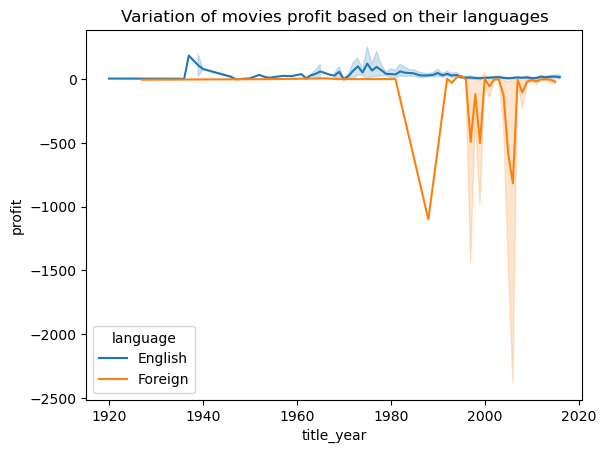

In [104]:
sns.lineplot(data["title_year"], data["profit"], hue = data["language"])
plt.title("Variation of movies profit based on their languages", fontsize=12)
plt.show()

**English** movies have never lost money whereas **Foreign** movies have been loosing money between 1980 and nearly 2019.

In [107]:
## let's see what are these movies that have lost most money
data[["movie_title", "profit"]][data["profit"] <= -2000].style.background_gradient(cmap="terrain_r")

,movie_title,profit
2323,Princess Mononoke,-2397.701809
2334,Steamboy,-2127.109510
2988,The Host,-12213.298588
3005,Fateless,-2499.804112
3859,Lady Vengeance,-4199.788333


# Gross comparison of long and short movies

In [111]:
data[["movie_title", "duration", "gross", "profit"]][data["duration"] == "long"].sort_values(by="profit", ascending=False).head(10).style.background_gradient(cmap="terrain_r")

,movie_title,duration,gross,profit
0,Avatar,long,760.505847,523.505847
29,Jurassic World,long,652.177271,502.177271
26,Titanic,long,658.672302,458.672302
3024,Star Wars: Episode IV - A New Hope,long,460.935665,449.935665
17,The Avengers,long,623.279547,403.279547
240,Star Wars: Episode I - The Phantom Menace,long,474.544677,359.544677
66,The Dark Knight,long,533.316061,348.316061
439,The Hunger Games,long,407.999255,329.999255
186,The Hunger Games: Catching Fire,long,424.645577,294.645577
697,Jurassic Park,long,356.784000,293.784000


In [112]:
data[["movie_title", "duration", "gross", "profit"]][data["duration"] == "short"].sort_values(by="profit", ascending=False).head(10).style.background_gradient(cmap="terrain_r")

,movie_title,duration,gross,profit
3080,E.T. the Extra-Terrestrial,short,434.949459,424.449459
509,The Lion King,short,422.783777,377.783777
812,Deadpool,short,363.024263,305.024263
521,Despicable Me 2,short,368.049635,292.049635
338,Finding Nemo,short,380.838870,286.838870
582,Shrek 2,short,436.471036,286.471036
2601,Home Alone,short,285.761243,267.761243
563,Minions,short,336.029560,262.029560
1181,The Sixth Sense,short,293.501675,253.501675
125,Frozen,short,400.736600,250.736600


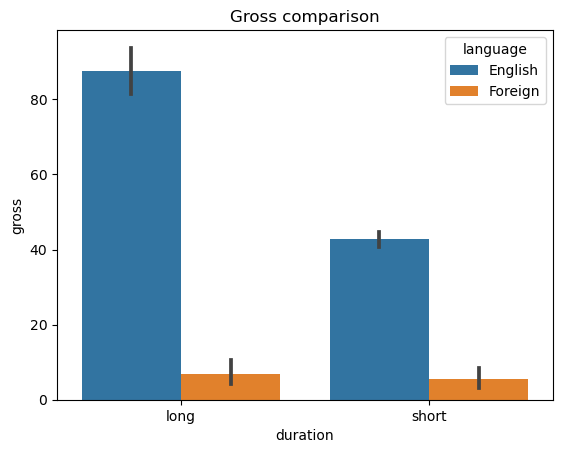

In [113]:
sns.barplot(data["duration"], data["gross"], hue=data["language"])
plt.title("Gross comparison")
plt.show()

**English movies** with long duration have higher gross than ones with short duration. However, for **Foreign movies** the difference between long and short duration can be considered as negligeable.

In [239]:
data[["movie_title", "gross"]][data["language"] == "Foreign"].sort_values(by="gross", ascending=False).head(20)

,movie_title,gross
2605,"Crouching Tiger, Hidden Dragon",128.067808
4024,March of the Penguins,77.413017
377,The Interpreter,72.515360
1236,Apocalypto,50.859889
484,The Legend of Zorro,45.356386
3705,Instructions Not Included,44.456509
2551,Pan's Labyrinth,37.623143
1298,Amélie,33.201661
3436,Rumble in the Bronx,32.333860
4000,The Secret in Their Eyes,20.167424


In [240]:
data[["movie_title", "gross"]][data["title_year"] == 2008].sort_values(by="gross", ascending=False).head(20)

,movie_title,gross
66,The Dark Knight,533.316061
69,Iron Man,318.298180
54,Indiana Jones and the Kingdom of the Crystal S...,317.011114
116,Hancock,227.946274
58,WALL·E,223.806889
184,Kung Fu Panda,215.395021
1378,Twilight,191.449475
2262,Twilight,191.449475
121,Madagascar: Escape 2 Africa,179.982968
12,Quantum of Solace,168.368427


# Association between IMDB Rating and Duration

In [119]:
print("Average IMDB score for long duration movies is: {0:.2f}".format(data["imdb_score"][data["duration"] == "long"].mean()) )
print("\n")
print("Average IMDB score for short duration movies is: {0:.2f}".format(data["imdb_score"][data["duration"] == "short"].mean()) )

Average IMDB score for long duration movies is: 7.06


Average IMDB score for short duration movies is: 6.28


Average score for long duration movies are higher than the average score of short duration movies.

In [122]:
# Highest rated long movie
data[["movie_title", "imdb_score"]][data["duration"] == "long"].sort_values(by="imdb_score", ascending=False).head(1)

,movie_title,imdb_score
1937,The Shawshank Redemption,9.3


In [123]:
# Highest rated short movie
data[["movie_title", "imdb_score"]][data["duration"] == "short"].sort_values(by="imdb_score", ascending=False).head(1)

,movie_title,imdb_score
3592,The Usual Suspects,8.6


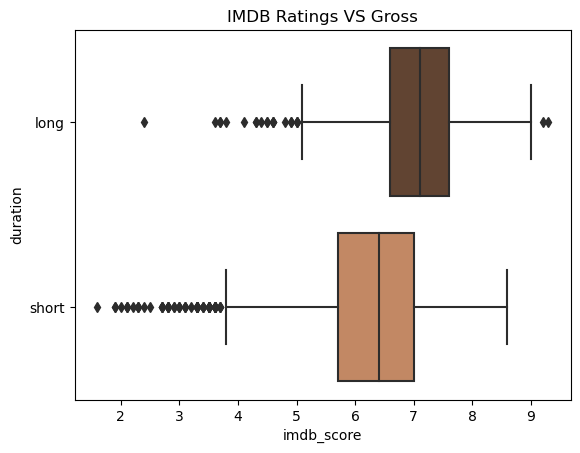

In [124]:
sns.boxplot(data["imdb_score"], data["duration"], palette="copper")
plt.title("IMDB Ratings VS Gross", fontsize=12)
plt.show()

The duration of movies has an impact on the film's gross receipts as long duration movies have higher revenues than the short duration movies. 

# Comparing critically acclaimed Actors

In [125]:
def query_actors(x):
    a = data[data["actor_1_name"] == x]
    b = data[data["actor_2_name"] == x]
    c = data[data["actor_3_name"] == x]
    x = a.append(b)
    y = x.append(c)
    
    y = y[["movie_title", 
           "budget",
           "gross", 
           "title_year",
           "genres",
           "language",
           "imdb_score"
          ]]
    return y

In [126]:
query_actors("Meryl Streep")

,movie_title,budget,gross,title_year,genres,language,imdb_score
410,It's Complicated,85.0,112.703470,2009,Comedy|Drama|Romance,English,6.6
1106,The River Wild,45.0,46.815748,1994,Action|Adventure|Crime|Thriller,English,6.3
1204,Julie & Julia,40.0,94.125426,2009,Biography|Drama|Romance,English,7.0
1408,The Devil Wears Prada,35.0,124.732962,2006,Comedy|Drama|Romance,English,6.8
1483,Lions for Lambs,35.0,14.998070,2007,Drama|Thriller|War,English,6.2
1575,Out of Africa,31.0,87.100000,1985,Biography|Drama|Romance,English,7.2
1618,Hope Springs,30.0,63.536011,2012,Comedy|Drama|Romance,English,6.3
1674,One True Thing,30.0,23.209440,1998,Drama,English,7.0
1925,The Hours,25.0,41.597830,2002,Drama|Romance,English,7.6
2781,The Iron Lady,13.0,29.959436,2011,Biography|Drama|History,English,6.4


In [133]:
def report_actors(x):
    a = data[data["actor_1_name"] == x]
    b = data[data["actor_2_name"] == x]
    c = data[data["actor_3_name"] == x]
    x = a.append(b)
    y = x.append(c)
    
    print("Time:", y["title_year"].min(), y["title_year"].max())
    print("\n")
    print("Max Gross : {0:.2f} millions".format(y["gross"].max()))
    print("\n")
    print("Average Gross : {0:.2f} millions".format(y["gross"].mean()))
    print("\n")
    print("Min Gross : {0:.2f} millions".format(y["gross"].min()))
    print("\n")
    print("Number of 100 millions movies : ", y[y["gross"] > 100].shape[0])
    print("\n")
    print("Average IMDB score : {0:.2f}".format(y["imdb_score"].mean()))
    print("\n")
    print("Most common genres : \n", y["genre_1"].value_counts().head())
    print("\n")
    print("Career number of movies : ", y.shape[0])
    

In [134]:
report_actors("Meryl Streep")

Time: 1985 2014


Max Gross : 143.70 millions


Average Gross : 55.23 millions


Min Gross : 9.66 millions


Number of 100 millions movies :  4


Average IMDB score : 6.81


Most common genres : 
 Drama        9
Comedy       7
Biography    3
Adventure    3
Action       1
Name: genre_1, dtype: int64


Career number of movies :  23


In [135]:
report_actors("Johnny Depp")

Time: 1984 2016


Max Gross : 423.03 millions


Average Gross : 96.93 millions


Min Gross : 1.82 millions


Number of 100 millions movies :  10


Average IMDB score : 6.79


Most common genres : 
 Action       9
Adventure    7
Biography    6
Drama        5
Comedy       4
Name: genre_1, dtype: int64


Career number of movies :  38


In [136]:
def retreive_nb_critically_accalaimed(x):
    a = data[data["actor_1_name"] == x]
    b = data[data["actor_2_name"] == x]
    c = data[data["actor_3_name"] == x]
    x = a.append(b)
    y = x.append(c)
    
    return y["num_critic_for_reviews"].sum().astype(int)

In [137]:
retreive_nb_critically_accalaimed("Johnny Depp")

9555

In [138]:
retreive_nb_critically_accalaimed("Meryl Streep")

4343

In [140]:
retreive_nb_critically_accalaimed("Tom Cruise")

6740

# Get Top movies based on Gross and IMDB

In [144]:
@interact(score=(0, 10))
def show_movies_more_than(column='imdb_score', score=9.0):
    x = data.loc[data[column] > score][["title_year",
                                        "movie_title",
                                       "director_name",
                                       "actor_1_name",
                                       "actor_2_name",
                                       "actor_3_name",
                                       "profit",
                                       "imdb_score"
                                       ]]
    x = x.sort_values(by="imdb_score", ascending=False)
    x = x.drop_duplicates(keep="first")
    return x

interactive(children=(Text(value='imdb_score', description='column'), IntSlider(value=9, description='score', …

In [145]:
@interact(x=(min(data["gross"].min(), data["budget"].min()), max(data["gross"].max(), data["budget"].max())))
def show_movies_more_than(column=["budget", "gross"], x=1000):
    return data.loc[data[column] > x][["movie_title", "duration", "gross", "profit", "imdb_score"]]

interactive(children=(Dropdown(description='column', options=('budget', 'gross'), value='budget'), FloatSlider…

# Recommending Movies based on Languages and Actors

**Recommending Movies based on Languages**

In [152]:
def recommend_lang(x):
    y = data[["language", "movie_title", "imdb_score"]][data["language"] == x]
    y = y.sort_values(by="imdb_score", ascending=False)
    return y.head(10)

In [150]:
data["language"].value_counts()

English    3673
Foreign     180
Name: language, dtype: int64

In [153]:
recommend_lang("Foreign")

,language,movie_title,imdb_score
4498,Foreign,"The Good, the Bad and the Ugly",8.9
4029,Foreign,City of God,8.7
4747,Foreign,Seven Samurai,8.7
2373,Foreign,Spirited Away,8.6
4921,Foreign,Children of Heaven,8.5
4259,Foreign,The Lives of Others,8.5
3931,Foreign,Samsara,8.5
4659,Foreign,A Separation,8.4
1329,Foreign,Baahubali: The Beginning,8.4
2970,Foreign,Das Boot,8.4


In [154]:
recommend_lang("English")

,language,movie_title,imdb_score
1937,English,The Shawshank Redemption,9.3
3466,English,The Godfather,9.2
2837,English,The Godfather: Part II,9.0
66,English,The Dark Knight,9.0
3355,English,Pulp Fiction,8.9
1874,English,Schindler's List,8.9
339,English,The Lord of the Rings: The Return of the King,8.9
683,English,Fight Club,8.8
270,English,The Lord of the Rings: The Fellowship of the R...,8.8
2051,English,Star Wars: Episode V - The Empire Strikes Back,8.8


**Recommending Movies based on Actors**

In [155]:
def recommend_actor(x):
    a = data[["movie_title", "imdb_score"]][data["actor_1_name"] == x]
    b = data[["movie_title", "imdb_score"]][data["actor_2_name"] == x]
    c = data[["movie_title", "imdb_score"]][data["actor_3_name"] == x]
    a = a.append(b)
    a = a.append(c)
    a = a.sort_values(by="imdb_score", ascending=False)
    return a.head(10)

In [157]:
recommend_actor("Johnny Depp")

,movie_title,imdb_score
3582,Platoon,8.1
205,Pirates of the Caribbean: The Curse of the Bla...,8.1
2449,Ed Wood,7.9
2177,Edward Scissorhands,7.9
1436,Donnie Brasco,7.8
3058,What's Eating Gilbert Grape,7.8
1898,Finding Neverland,7.8
2389,Fear and Loathing in Las Vegas,7.7
1629,Blow,7.6
1420,A Nightmare on Elm Street,7.5


# Recommending Similar Genres and Movies

In [158]:
from mlxtend.preprocessing import TransactionEncoder

In [159]:
x = data["genres"].str.split("|")
te = TransactionEncoder()
x = te.fit_transform(x)
x = pd.DataFrame(x, columns = te.columns_)

In [160]:
x.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [187]:
genres = x.astype(int)

In [188]:
genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [189]:
## Inserting the movies title
genres.insert(0, "movie_title", data["movie_title"])

In [215]:
genres.head()

,movie_title,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Avatar,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,NaN,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [224]:
## There are some NaN present in the column "movie_title". This line is to remove them.
genres = genres[genres["movie_title"] == genres["movie_title"]]

In [225]:
## Setting the "movie_title" column as index.
genres = genres.set_index("movie_title")

In [226]:
genres

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Spectre,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
John Carter,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Four Weddings and a Funeral,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
25th Hour,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Bound,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [227]:
def recommend_genres(x):
    x = genres[x]
    similar_genres = genres.corrwith(x)
    similar_genres = similar_genres.sort_values(ascending=False)
    similar_genres = similar_genres.iloc[1:]
    return similar_genres.head(5)

In [228]:
recommend_genres("Comedy")

Family       0.233959
Animation    0.188316
Romance      0.175412
Musical      0.051101
Fantasy      0.031120
dtype: float64

**Recommending similar movies**

In [229]:
movies = genres.transpose()

In [230]:
movies.head()

movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,...,The Texas Chainsaw Massacre 2,Only God Forgives,The Names of Love,Savage Grace,Police Academy,Four Weddings and a Funeral,25th Hour,Bound,Requiem for a Dream,Tango
Action,1,1,1,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Adventure,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,1,0,0,0,0,...,1,1,1,1,1,0,0,0,0,1


In [234]:
def recommend_movies(x):
    x = movies[x+"\xa0"]
    similar_movies = movies.corrwith(x)
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(20)

In [232]:
data["movie_title"]

0                                         Avatar 
1       Pirates of the Caribbean: At World's End 
2                                        Spectre 
3                          The Dark Knight Rises 
5                                    John Carter 
                          ...                    
5033                                      Primer 
5034                                      Cavite 
5035                                 El Mariachi 
5037                                   Newlyweds 
5042                           My Date with Drew 
Name: movie_title, Length: 3853, dtype: object

In [235]:
recommend_movies("Pirates of the Caribbean: At World's End")

movie_title
The Flowers of War                            1.0
Edge of Darkness                              1.0
Pirates of the Caribbean: At World's End      1.0
The Sorcerer's Apprentice                     1.0
Risen                                         1.0
Rapa Nui                                      1.0
X-Men Origins: Wolverine                      1.0
Legally Blonde                                1.0
The Matrix Reloaded                           1.0
Angels & Demons                               1.0
Lost in Space                                 1.0
Transformers: Dark of the Moon                1.0
The Last Samurai                              1.0
The Girl with the Dragon Tattoo               1.0
The Hobbit: The Battle of the Five Armies     1.0
American Sniper                               1.0
Australia                                     1.0
American Reunion                              1.0
R.I.P.D.                                      1.0
The Avengers                          